# Yoga Pose Classification

This script is an adaptation of [this article](https://medium.com/@leahnagy/yoga-pose-classification-with-tensorflows-movenet-model-3e5771fda292).

# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from skimage.io import imread,imshow
from skimage import transform
from tqdm import tqdm

In [2]:
# Get class labels
labels = list()
path=os.path.join(".", "DATASET", "TRAIN")
os.listdir(path)
for i in os.listdir(path):
  labels.append(i)

In [3]:
labels

['downdog', 'goddess', 'plank', 'tree', 'warrior2']

In [4]:
## Counting the Samples
Total_sample=0
for i in os.listdir(path):
    print(f'Length of :{i}= {len(os.listdir(os.path.join(path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print(f'Total Samples:{Total_sample}')

Length of :downdog= 223
Length of :goddess= 180
Length of :plank= 266
Length of :tree= 160
Length of :warrior2= 252
Total Samples:1081


In [9]:
img_size = 224
X=[] 
Y=[]
i=0
for idx,img in enumerate(os.listdir(path)):
    for img_name in tqdm(os.listdir(os.path.join(path, img))):
        if i<300:
            try:
                img_file=imread(os.path.join(path,img,img_name))
                if img_file is not None:
                    img_file=transform.resize(img_file,(img_size,img_size,3))
                    X.append(img_file)
                    Y.append(idx)
            except Exception:
                print("Failed to read {}\n".format(img_name))
            
        else:
            break
        i=i+1
    i=0
X=np.asarray(X)
Y=np.asarray(Y)

 29%|██▉       | 47/160 [00:10<00:11, 10.18it/s]

Failed to read 00000114.jpg



100%|██████████| 252/252 [00:38<00:00,  6.57it/s]


In [10]:
X[0]

array([[[0.95323651, 0.93755023, 0.9414718 ],
        [0.95640688, 0.94072061, 0.94464218],
        [0.95686263, 0.94117635, 0.94509792],
        ...,
        [0.97700555, 0.96916241, 0.97308398],
        [0.97656109, 0.96871795, 0.97263952],
        [0.97892763, 0.97108449, 0.97500606]],

       [[0.95323651, 0.93755023, 0.9414718 ],
        [0.95640688, 0.94072061, 0.94464218],
        [0.95686263, 0.94117635, 0.94509792],
        ...,
        [0.97700555, 0.96916241, 0.97308398],
        [0.97647189, 0.96862875, 0.97255032],
        [0.97649263, 0.9686495 , 0.97257107]],

       [[0.9532589 , 0.93757262, 0.94149419],
        [0.95638283, 0.94069656, 0.94461813],
        [0.95686235, 0.94117608, 0.94509764],
        ...,
        [0.97700554, 0.96916241, 0.97308398],
        [0.97639849, 0.96855535, 0.97247692],
        [0.97448918, 0.96664604, 0.97056761]],

       ...,

       [[0.94508344, 0.90588173, 0.9098033 ],
        [0.94525572, 0.90605401, 0.90997558],
        [0.94781853, 0

In [11]:
Y.shape

(1080,)

In [12]:
Y

array([0, 0, 0, ..., 4, 4, 4])

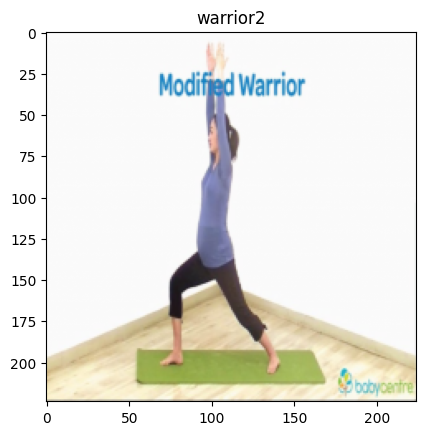

In [13]:
# visualize sample image
plt.imshow(X[1000])
plt.title(labels[Y[1000]])
plt.show()

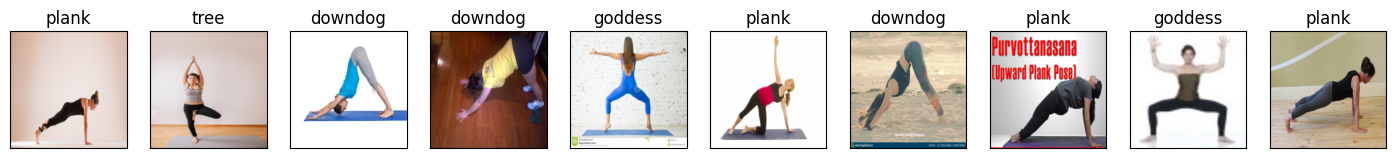

In [14]:
# Show multiple random images
from random import randint
n = 50  # how many digits we will display
plt.figure(figsize=(90,40))
for i in range(10,20):
    # display original
    rn=randint(0,1079)
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[rn])
    plt.title(labels[Y[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

### Repeat process with test set

In [15]:
test_path=os.path.join(".", "DATASET", "TEST")
test_path

'.\\DATASET\\TEST'

In [10]:
## Counting the Samples
Total_sample=0
for i in os.listdir(test_path):
    print(f'Length of :{i}= {len(os.listdir(os.path.join(test_path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(test_path,i)))
print(f'Total Samples:{Total_sample}')

Length of :downdog= 97
Length of :goddess= 80
Length of :plank= 115
Length of :tree= 69
Length of :warrior2= 109
Total Samples:470


In [17]:
img_size = 224
X_test=[] 
Y_test=[]
i=0
for idx,img in enumerate(labels):
    for img_name in tqdm(os.listdir(os.path.join(test_path, img))):
        if i<300:
            try:
                img_file=imread(os.path.join(test_path,img,img_name))
                if img_file is not None:
                    img_file=transform.resize(img_file,(img_size,img_size,3))
                    X_test.append(img_file)
                    Y_test.append(idx)
            except Exception:
                print("Failed to read {}\n".format(img_name))
        else:
            break
        i=i+1
    i=0
X_test=np.asarray(X_test)
Y_test=np.asarray(Y_test)

100%|██████████| 109/109 [00:19<00:00,  5.52it/s]


In [18]:
X_test[400]

array([[[0.90430523, 0.90465879, 0.91250193],
        [0.91758694, 0.92032574, 0.92816888],
        [0.93416221, 0.93800778, 0.94585091],
        ...,
        [0.93456553, 0.9384871 , 0.94633023],
        [0.93511964, 0.93904121, 0.94688435],
        [0.93456607, 0.93848764, 0.94633077]],

       [[0.90457087, 0.90568245, 0.91352558],
        [0.91748436, 0.92074044, 0.92858358],
        [0.93427982, 0.93796194, 0.94580507],
        ...,
        [0.936535  , 0.94045657, 0.94829971],
        [0.93624676, 0.94016833, 0.94801147],
        [0.93607087, 0.93999244, 0.94783558]],

       [[0.90672202, 0.90715777, 0.91500091],
        [0.91890491, 0.92148915, 0.92933229],
        [0.93521433, 0.93835343, 0.94619656],
        ...,
        [0.93807734, 0.9419989 , 0.94984204],
        [0.937647  , 0.94156857, 0.94941171],
        [0.937445  , 0.94136657, 0.94920971]],

       ...,

       [[0.88511028, 0.88479484, 0.89280971],
        [0.88506415, 0.88502727, 0.89289325],
        [0.88452102, 0

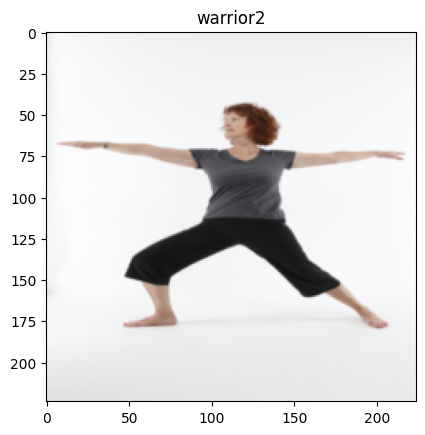

In [19]:
# visualize sample image
plt.imshow(X_test[400])
plt.title(labels[Y_test[400]])
plt.show()

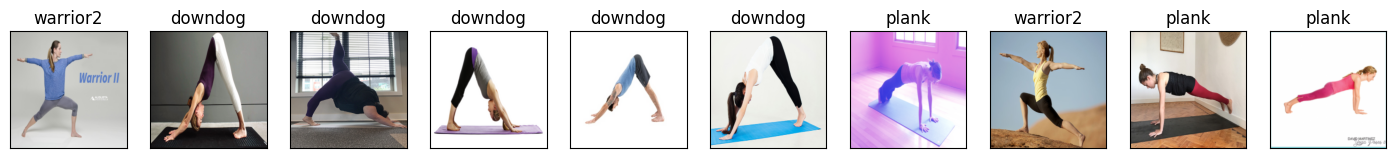

In [20]:
# Show multiple random images
from random import randint
n = 50  # how many digits we will display
plt.figure(figsize=(90,40))
for i in range(10,20):
    # display original
    rn=randint(0,470)
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_test[rn])
    plt.title(labels[Y_test[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [ ]:
with open('X_train.npy', 'wb') as f:
  np.save(f, X)

In [ ]:
with open('Y_train.npy', 'wb') as f:
  np.save(f, Y)

In [ ]:
with open('X_test1.npy', 'wb') as f:
  np.save(f, X_test)

In [ ]:
with open('Y_test1.npy', 'wb') as f:
  np.save(f, Y_test)